# **Make your fist experience with Tensorflow-Keras**
Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images.

## Loading Training and Validation Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

2024-10-02 15:26:55.699275: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 15:26:55.718685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 15:26:55.737985: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 15:26:55.743680: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 15:26:55.759039: I tensorflow/core/platform/cpu_feature_guar

In [3]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_val, y_val) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# **Importing necessary Libraries**

In [4]:
from tensorflow.keras.models import Sequential # Model type to be used
from tensorflow.keras.layers import Dense, Activation, Dropout# Make Fully connected (FC) layers
from tensorflow.keras.utils import to_categorical # NumPy related tools

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers

Visualization of some input images

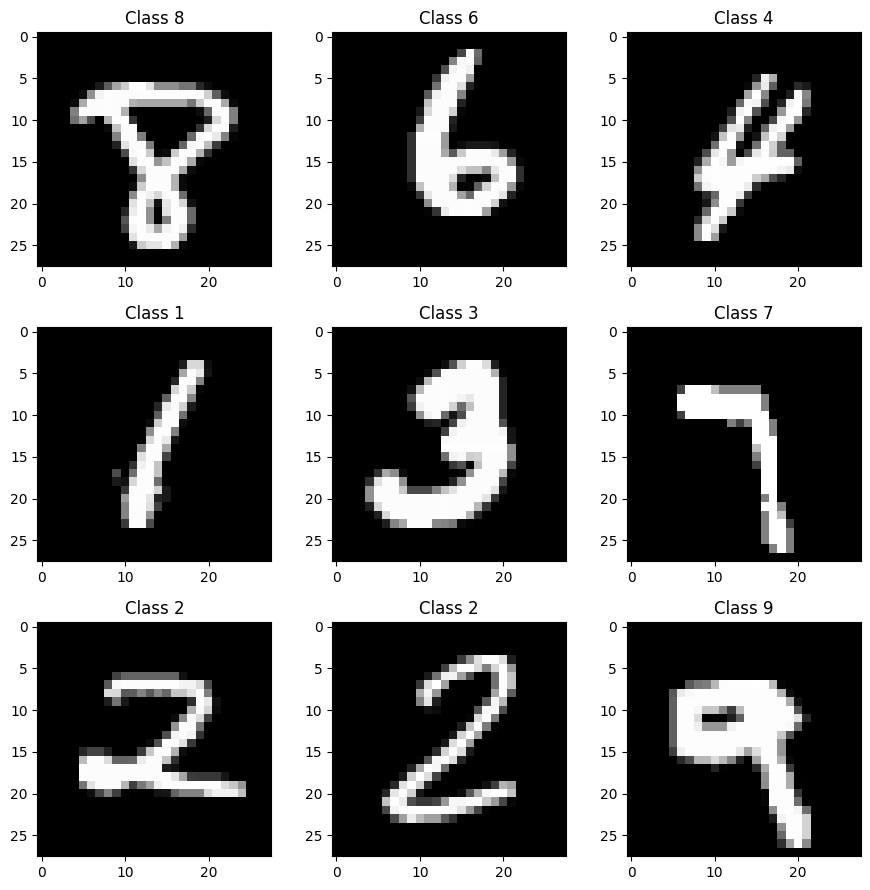

In [5]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_val))
    plt.imshow(X_val[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_val[num]))

plt.tight_layout()

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector. Each image needs to be then reshaped (or flattened) into a vector.

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_val = X_val.reshape(X_val.shape[0], 784).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train /= 255
X_val /= 255

We then modify our classes (unique digits) to be in the one-hot format, i.e.

In [8]:
# one hot encode outputs
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)

# Building the simplest fully connected network (FCN) with just one layer

In [9]:
# The Sequential model is a linear stack of layers and is very common.
model = Sequential([
    Dense(10), # It is the output layer and should be equal to the number of desired classes (10 in this case).
    Activation('softmax'),
])


## Compiling the model

Keras is built on top of TensorFlow. It allows you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiling a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.

Our predictions are probability distributions across the ten different digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc."), and the target is a probability distribution with 100% for the correct category, and 0 for everything else. The cross-entropy is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

2024-10-02 15:28:16.099564: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Train the model!

In [11]:
history = model.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=40, batch_size=32,
          verbose=1)

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4571 - loss: 2.2440 - val_accuracy: 0.7067 - val_loss: 2.0730
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6983 - loss: 2.0261 - val_accuracy: 0.7435 - val_loss: 1.8714
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7370 - loss: 1.8332 - val_accuracy: 0.7751 - val_loss: 1.6938
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7582 - loss: 1.6628 - val_accuracy: 0.7847 - val_loss: 1.5385
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7725 - loss: 1.5174 - val_accuracy: 0.8029 - val_loss: 1.4037
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7859 - loss: 1.3876 - val_accuracy: 0.8124 - val_loss: 1.2875
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7965 - loss: 1.2793 - val_accuracy: 0.8184 - val_loss: 1.1876
Epoch 8/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8076 - loss: 1.1839 - 

In [14]:
model.save('model.h5')

# Visualization

Here, we use the matplotlib library to visualize the training curves.
The x-axis corresponds to the number of epochs (how many times all images have been seen) and the y-axis to the loss value, on the left, and the accuracy, on the right.

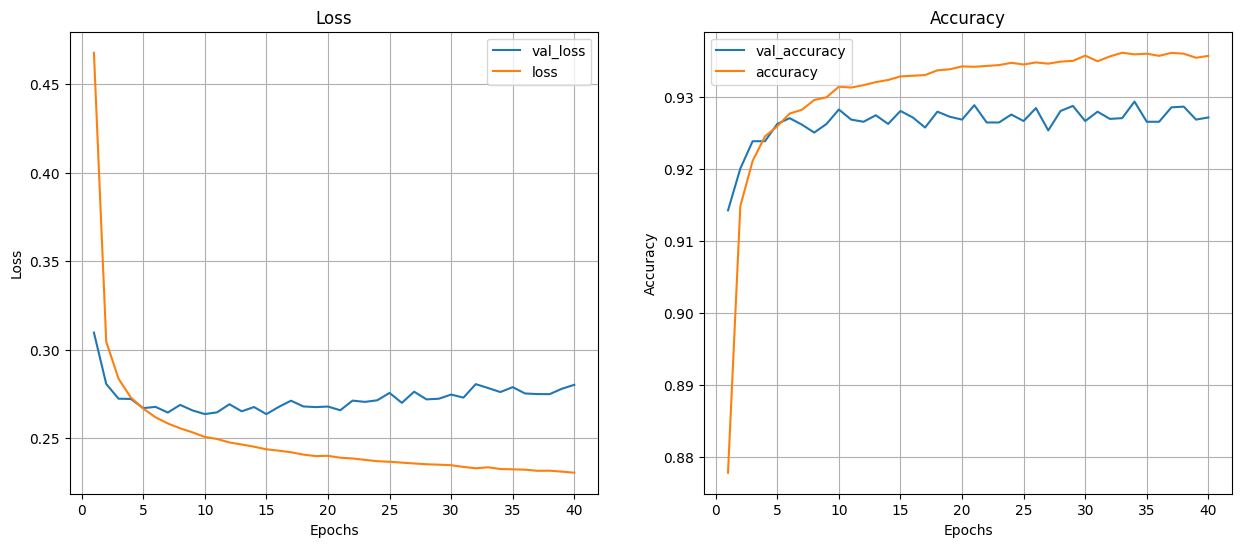

In [ ]:
epochs = range(1, len(history.history['val_loss'])+1)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.plot(epochs, history.history['loss'], label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim([0.5,1.5])
plt.grid()
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='val_accuracy')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
#plt.ylim([0,1])
plt.grid()
plt.legend()
plt.show()

## Evaluate Model's Accuracy on Test Data
Your test data **Must** be different from the validation data, but in this example, we will use the validation data as the test data as well.

In [ ]:
score = model.evaluate(X_val, Y_val)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9168 - loss: 0.3152
Test score: 0.28012892603874207
Test accuracy: 0.9271000027656555


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predict_x=model.predict(X_val)
predicted_classes=np.argmax(predict_x,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_val)[0]

incorrect_indices = np.nonzero(predicted_classes != y_val)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Here, we just have a look on how the network "sees" the images (flatten or unwrapped here). There is no 2D spatial information about data used here.

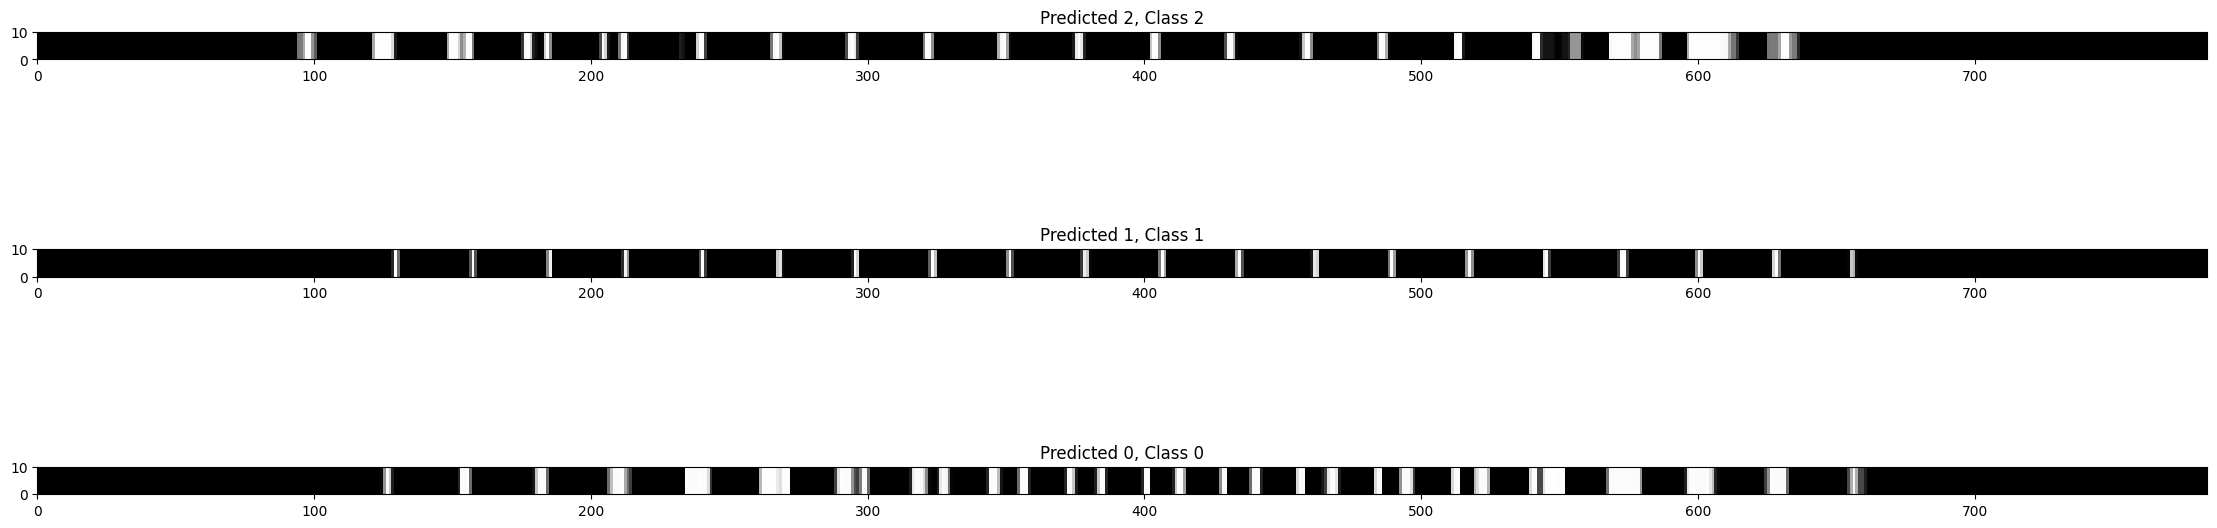

In [ ]:
plt.figure(figsize=(28,8))
for i in range(1,4):
  plt.subplot(3,1,i)
  plt.imshow(X_val[i].reshape(1,28**2), cmap='gray', interpolation='none', extent=[0,28**2,0,10])
  plt.title("Predicted {}, Class {}".format(predicted_classes[i], y_val[i]))
plt.show()


Below, we check the correct and incorrect predictions, with first the correct predictions.

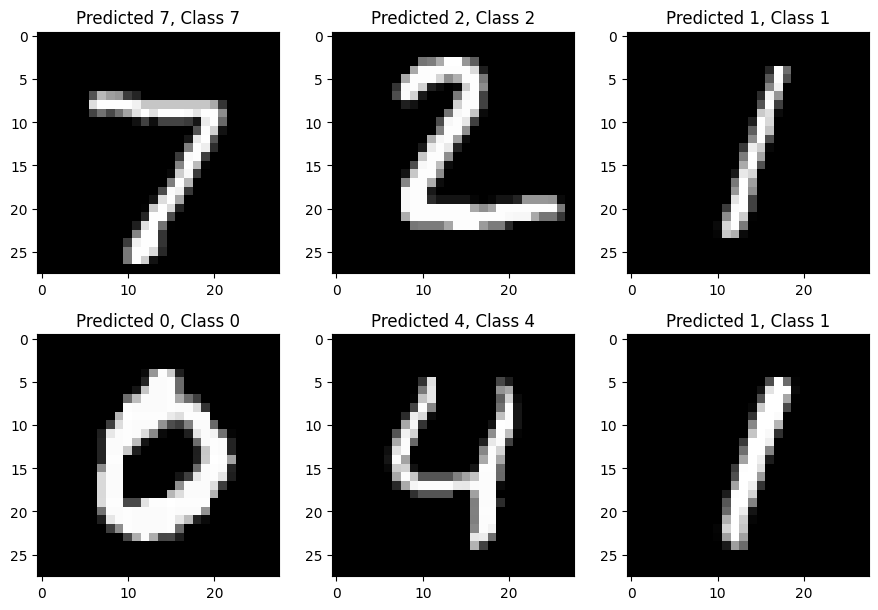

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_val[correct]))

plt.tight_layout()


And here the incorrect ones.

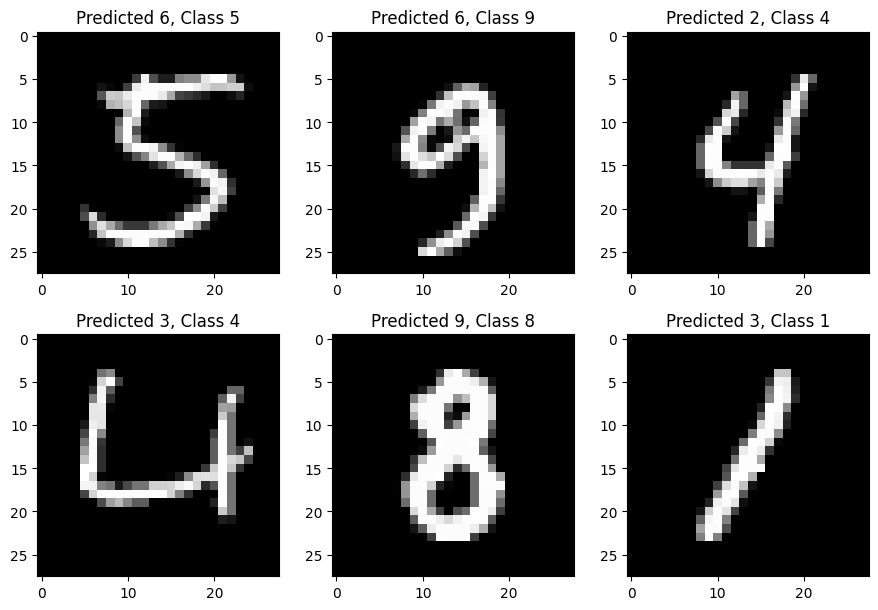

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_val[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_val[incorrect]))

plt.tight_layout()

# **Let's go Deeper**
We will add four more layers to our model. We use Droupout in our model to reduce overfitting

In [ ]:
# Dropout helps protect the model from memorizing or "overfitting" the training data.
Pkeep=0.25
modelDeepFC = Sequential([
    Dense(200, input_shape=(784,)),
    Activation('relu'),
    # Dropout(Pkeep),
    Dense(100, input_shape=(200,)),
    Activation('relu'),
    # Dropout(Pkeep),
    Dense(60, input_shape=(100,)),
    Activation('relu'),
    # Dropout(Pkeep),
    Dense(30, input_shape=(60,)),
    Activation('relu'),
    # Dropout(Pkeep),
    Dense(10),
    Activation('softmax'),
])

modelDeepFC.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 200)                 │         157,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 60)                  │           6,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │           1,830 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 185,300 (723.83 KB)

 Trainable params: 185,300 (723.83 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelDeepFC.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = modelDeepFC.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=5, batch_size=32,
          verbose=1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8704 - loss: 0.4297 - val_accuracy: 0.9632 - val_loss: 0.1174
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9687 - loss: 0.1012 - val_accuracy: 0.9695 - val_loss: 0.1007
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9786 - loss: 0.0700 - val_accuracy: 0.9662 - val_loss: 0.1157
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9826 - loss: 0.0567 - val_accuracy: 0.9754 - val_loss: 0.0802
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9872 - loss: 0.0412 - val_accuracy: 0.9738 - val_loss: 0.0904


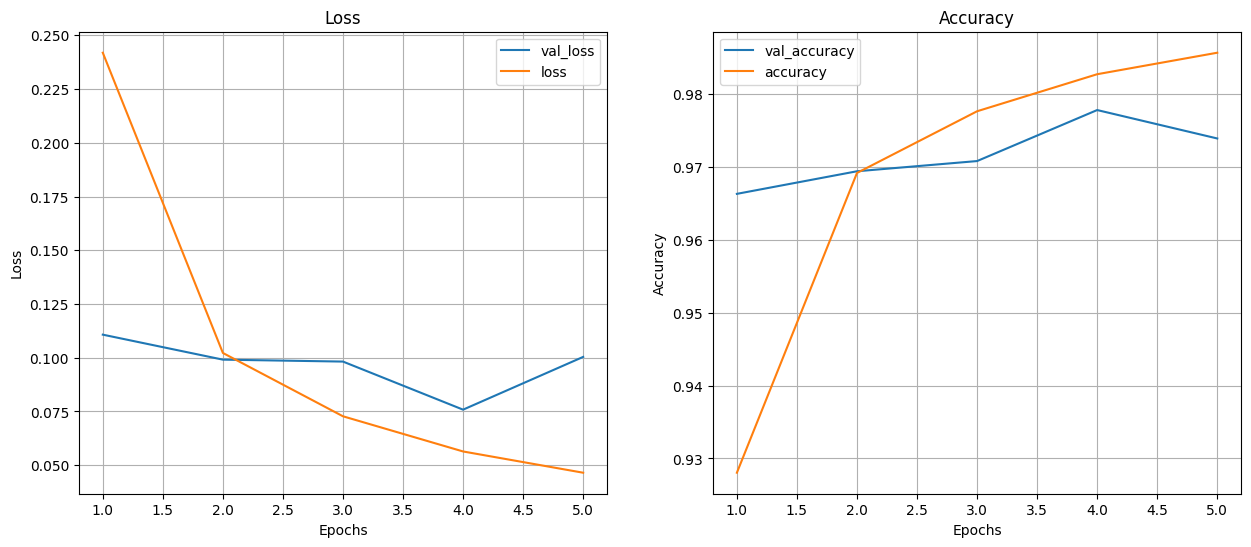

In [ ]:
epochs = range(1, len(history.history['val_loss'])+1)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.plot(epochs, history.history['loss'], label='loss')
#plt.ylim([0.5,1.5])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='val_accuracy')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
#plt.ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [ ]:
scoreDeepFC = modelDeepFC.evaluate(X_val, Y_val)
print('Test score:', scoreDeepFC[0])
print('Test accuracy:', scoreDeepFC[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.1065
Test score: 0.090410515666008
Test accuracy: 0.973800003528595


The performance of the last model with more layers showed a better performance compare with our first model.

# **Let's go further with introducing CNN**
Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. curvature, edges) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies kernels (filters) that traverse through each image and generate feature maps.

In [ ]:
# import some additional tools

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split

In [ ]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

print(X_train.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') #add an additional dimension to represent the single-channel
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print(X_train.shape)
X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In the cell below, we split the training data into two subsets: the training and validation datasets. This allows us to later use the test dataset, which the model has not been trained on, to evaluate its performance.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# one hot encode outputs
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_val = to_categorical(y_val)

In [ ]:
modelCNN = Sequential([

    # Convolution Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), # 32 different 3x3 kernels -- so 32 feature maps
    MaxPooling2D(pool_size=(2, 2)), # Pool the max values over a 2x2 kernel

    # Convolution Layer 2
    Conv2D(64, (3, 3), activation='relu'), # 64 different 3x3 kernels
    MaxPooling2D(pool_size=(2, 2)),

    # Convolution Layer 3
    Conv2D(128, (3, 3), activation='relu'), # 128 different 3x3 kernels

    Flatten(), # Flatten final 7x7x128 output matrix into a 1024-length vector

    # Fully Connected Layer 4
    Dense(512), # 512 FCN nodes
    Activation('relu'),
    Dropout(0.2),
    Dense(10),
    Activation('softmax'),
])
modelCNN.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 10)                  │           5,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 688,138 (2.63 MB)

 Trainable params: 688,138 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modelCNN.compile(loss='categorical_crossentropy',
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

history = modelCNN.fit(X_train, Y_train,
          validation_data=(X_val, Y_val),
          epochs=5, batch_size=64,
          verbose=1)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8755 - loss: 0.3902 - val_accuracy: 0.9852 - val_loss: 0.0541
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9832 - loss: 0.0527 - val_accuracy: 0.9873 - val_loss: 0.0425
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9899 - loss: 0.0325 - val_accuracy: 0.9886 - val_loss: 0.0399
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9924 - loss: 0.0231 - val_accuracy: 0.9902 - val_loss: 0.0356
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9930 - loss: 0.0193 - val_accuracy: 0.9882 - val_loss: 0.0417


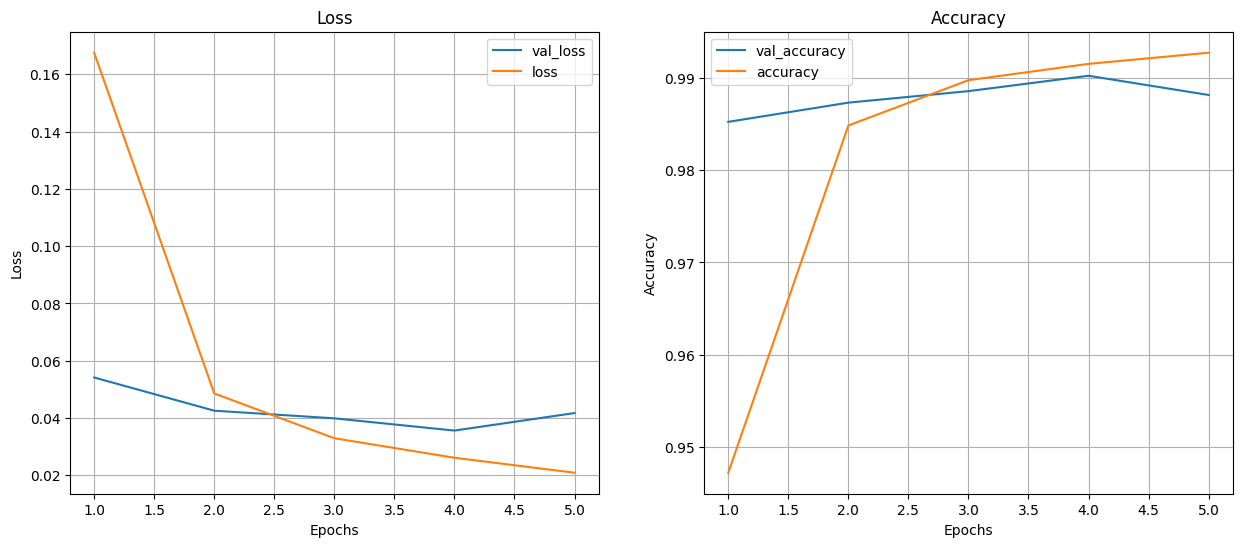

In [ ]:
epochs = range(1, len(history.history['val_loss'])+1)
plt.figure(figsize=(15,6))
plt.subplot(121)
plt.title('Loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss')
plt.plot(epochs, history.history['loss'], label='loss')
#plt.ylim([0.5,1.5])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy')
plt.plot(epochs, history.history['val_accuracy'], label='val_accuracy')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
#plt.ylim([0,1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

**Evaluation and Prediction**

We can use our model to make a prediction on new images.

In [ ]:
modelCNN.evaluate(X_test,Y_test) #Evaluation of the model on the test dataset

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9893 - loss: 0.0332


[0.029416747391223907, 0.9904000163078308]

In [ ]:
predictions = modelCNN.predict(X_test) # Prediction of classes
classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


We usually evaluate a model using a confusion matrix which has two entries: the predictions and the ground truth. A good model will be defined by high coefficients on the diagonal.

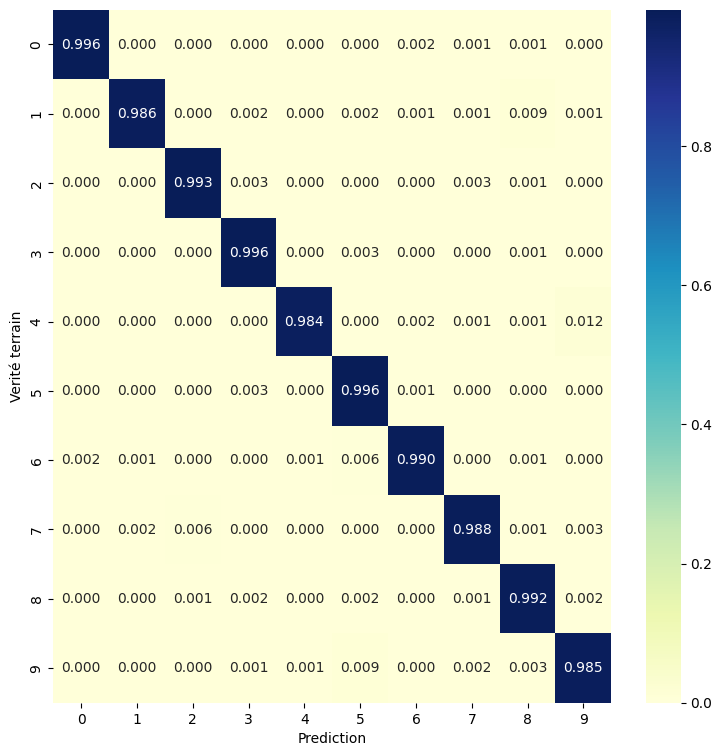

In [ ]:
from sklearn import metrics
import seaborn as sns
import numpy.matlib
matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), classes)
matrix_normalized = (matrix/np.matlib.repmat(np.sum(matrix,axis=1).reshape((1,10)),10,1)) # selon axe 0 : combien d'objets classés en tant que i viennent effectivement de i # selon axe 1 : comment ont été classées les différentes classes
sns.heatmap(matrix_normalized, annot=True, cmap="YlGnBu", fmt='.3f')
plt.xlabel('Prediction')
plt.ylabel('Verité terrain')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
The predicted label is:  8
The real label is:  8


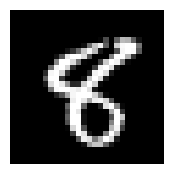

In [ ]:
# Prediction of classes of a single image
plt.figure(figsize=(2,2))
rndIm = np.random.randint(1000)
img=X_test[rndIm,:,:,:]
img = np.array(img).reshape(-1, 28, 28, 1)
output = modelCNN.predict(img)
print('The predicted label is: ',np.argmax(output[0]))
print('The real label is: ',y_test[rndIm])
plt.imshow(img.reshape(28,28), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
incorrect_indices = np.nonzero(classes != y_test)[0]

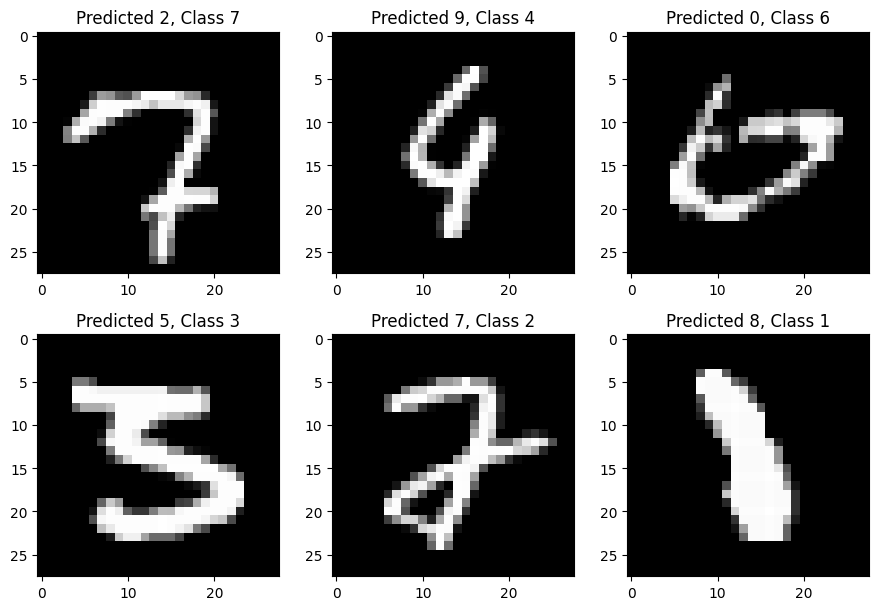

In [ ]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:6]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(classes[incorrect], y_test[incorrect]))

plt.tight_layout()